In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import copy
array_like_types = (list, tuple, np.ndarray, xr.core.dataarray.DataArray)
numeric_types = (int, float)
NoneType = (type(None),)
s2h = 1/3600
h2s = 3600
def func_sza(t=np.linspace(0, 3600*24), elv_max=90):
    #t in s
    elv = elv_max - 90*((np.cos(2*np.pi/(3600*24) * t)) + 1)
    return 90-elv

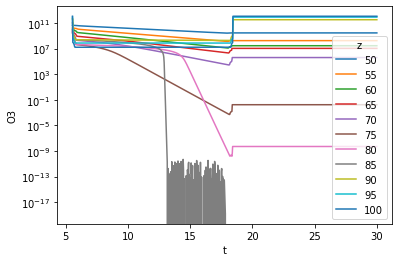

In [15]:
ds = xr.open_dataset('./ode_result/ode_frederick_6_30.nc')
(ds.O3).plot.line(x='t', yscale='log', add_legend=True)
# plt.gca().set(xlim=(15,20))
# plt.gca().set_xticklabels(plt.gca().get_xticks()%24)
plt.show()

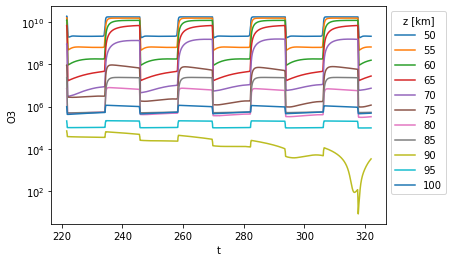

<Figure size 432x288 with 0 Axes>

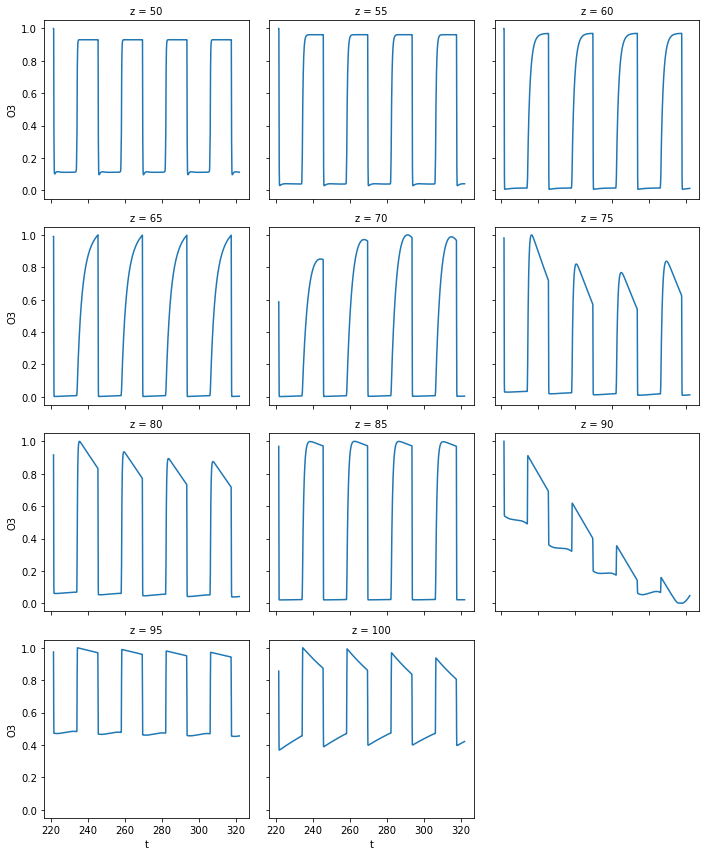

In [3]:
dir = './ode_result/'
ds = xr.open_dataset(dir+'ode_result_221_222_60_pre_Js.nc')
ds = xr.auto_combine([ds, xr.open_dataset(dir+'ode_result_222_247_60_pre_Js.nc')])
ds = xr.auto_combine([ds, xr.open_dataset(dir+'ode_result_247_272_60_pre_Js.nc')])
ds = xr.auto_combine([ds, xr.open_dataset(dir+'ode_result_272_297_60_pre_Js.nc')])
ds = xr.auto_combine([ds, xr.open_dataset(dir+'ode_result_297_322_60_pre_Js.nc')])

ds.O3.plot.line(x='t', hue='z', yscale='log', add_legend=True)
plt.gca().get_legend().set(bbox_to_anchor=(1, 1), title='z [km]') 
plt.show()

plt.figure()
ds.O3.pipe(lambda x: x/x.max(dim='t')).plot(x='t', col='z', col_wrap=3)

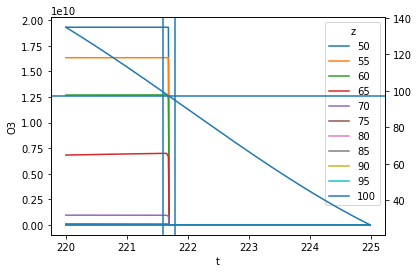

In [2]:
ds = xr.open_dataset('./ode_result_{}_{}_{}_path_modified_no_switch_interp_all.nc'.format(220,225,50))
ds.O3.plot.line(x='t', hue='z',yscale='linear')
# ds = xr.open_dataset('./ode_result_{}_{}_{}_path_modified_no_switch_interp.nc'.format(198,223,50))
# ds.O3.sel(t=slice(220,225)).plot.line(x='t', hue='z',yscale='linear')

ax1 = plt.gca().twinx()
sza = ds.t.pipe(lambda x: func_sza(x*h2s))
ax1.plot(ds.t, sza)
ax1.axhline(y=97)
ax1.axvline(x=221.6)
ax1.axvline(x=221.8)

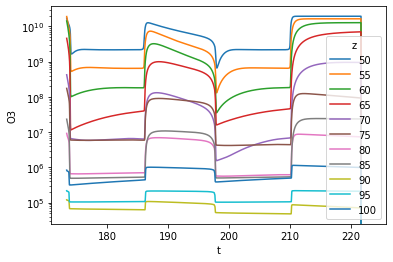

In [4]:
ds = xr.open_dataset('./ode_result_{}_{}_{}_path_modified_no_switch.nc'.format(173,198,50))
ds1 = xr.open_dataset('./ode_result_{}_{}_{}_path_modified_no_switch_interp.nc'.format(198,223,50))
# ds2 = xr.open_dataset('./ode_result_{}_{}_{}_path_modified_no_switch_interp_all.nc'.format(221,246,50))
line_plt_args = dict(x='t', yscale='log', add_legend=True)
dss = xr.auto_combine([ds,ds1])
dss.O3.plot.line(**line_plt_args)

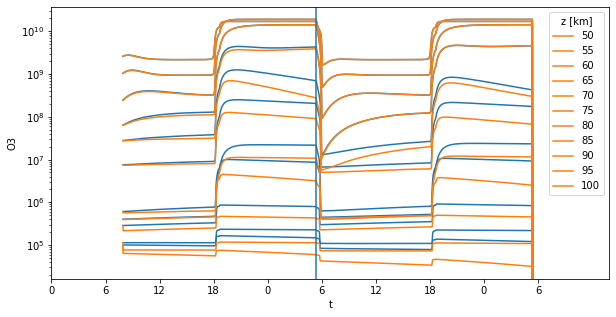

In [39]:
ds0 = xr.auto_combine([xr.open_dataset('./ode_result_{}_{}_{}.nc'.format(127,149,20)),
                       xr.open_dataset('./ode_result_{}_{}_{}.nc'.format(149,179,50))])
ds1 = xr.auto_combine([xr.open_dataset('./ode_result_{}_{}_{}_H_x2.nc'.format(127,149,20)),
                       xr.open_dataset('./ode_result_{}_{}_{}_H_x2.nc'.format(149,179,50))])
ds2 = xr.open_dataset('./ode_result_{}_{}_{}_OH_x2.nc'.format(127,149,20))

plt.figure(figsize=(10,5))
line_plt_args = dict(x='t', yscale='log', add_legend=True)
ds0.O3.plot.line(**line_plt_args, color='C0')
ds1.O3.plot.line(**line_plt_args, color='C1')
# ds2.O3.plot.line(**line_plt_args, color='C2')
plt.gca().get_legend().set(bbox_to_anchor=(1, 1), title='z [km]') 
plt.gca().set_xticks(np.arange(127//24*24, 179, 6))
plt.gca().set_xticklabels(np.arange(127//24*24, 179, 6)%24)

plt.axvline(x=ds2.t[-1])
plt.show()

# fig = plt.figure()
# plt_args = dict(x='t', col='z', col_wrap=3, yscale='linear')
# ds1.O3.pipe(lambda x: (x-ds0.O3)/ds0.O3 * 100).rename(' O3 change %').sel(t=slice(149)).plot(**plt_args, color='C0')
# # ds1.O3.sel(t=slice(149)).plot(**plt_args, color='C1')
# # ds2.O3.sel(t=slice(149)).plot(**plt_args, color='C2')

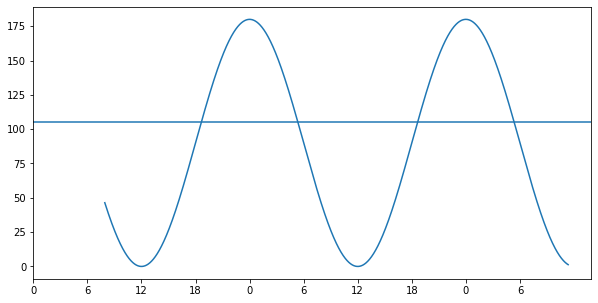

In [45]:
def func_sza(t=np.linspace(0, 3600*24), elv_max=90):
    #t in s
    elv = elv_max - 90*((np.cos(2*np.pi/(3600*24) * t)) + 1)
    return 90-elv
plt.figure(figsize=(10,5))
plt.plot(ds1.t, func_sza(ds1.t*3600))
plt.axhline(y=105)
plt.gca().set_xticks(np.arange(127//24*24, 175, 6))
plt.gca().set_xticklabels(np.arange(127//24*24, 175, 6)%24)
plt.show()

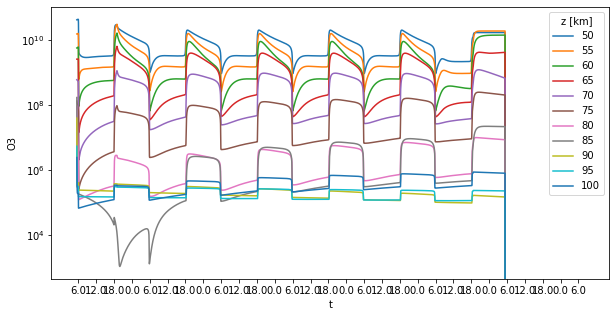

<Figure size 720x360 with 0 Axes>

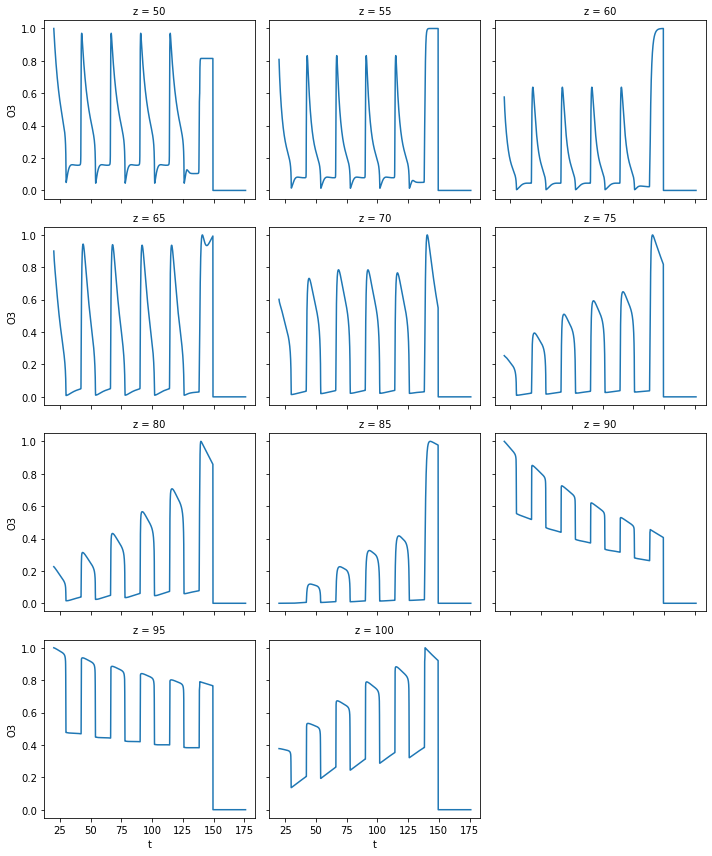

In [5]:
ode_result1 = xr.open_dataset('./ode_result_{}_{}_{}.nc'.format(str(5.5), str(19.0), '50'))
ode_result2 = xr.open_dataset('./ode_result_{}_{}_{}.nc'.format(18, 22, '50'))
ode_result3 = xr.open_dataset('./ode_result_{}_{}_{}.nc'.format(22, 31, '50'))
ode_result4 = xr.open_dataset('./ode_result_{}_{}_{}.nc'.format(31, 55, '50'))
ode_result5 = xr.open_dataset('./ode_result_{}_{}_{}.nc'.format(55, 127, '50'))
ode_result6 = xr.open_dataset('./ode_result_{}_{}_{}.nc'.format(127, 175, '20'))


result_total = ode_result1.combine_first(ode_result2).combine_first(ode_result3).combine_first(ode_result4
                                    ).combine_first(ode_result5).combine_first(ode_result6)
plt.figure(figsize=(10,5))
result_total.O3.plot.line(x='t', yscale='log', add_legend=True)
plt.gca().get_legend().set(bbox_to_anchor=(1, 1), title='z [km]') 
plt.gca().set_xticks(np.arange(6,result_total.t[-1],6))
plt.gca().set_xticklabels(np.arange(6,result_total.t[-1],6)%24)
plt.show()

plt.figure(figsize=(10,5))
result_total.O3.sel(t=slice(20,result_total.t[-1])).pipe(lambda x: x/x.max(dim='t')).plot(x='t', col='z', col_wrap=3)
# plt.gca().get_legend().set(bbox_to_anchor=(1, 1), title='z [km]') 
# plt.gca().set_xticks(np.arange(6,result_total.t[-1],6))
# plt.gca().set_xticklabels(np.arange(6,result_total.t[-1],6)%24)
# plt.ylabel('O3/O3_max_t')
plt.show()

(1000.0, 100000000.0)

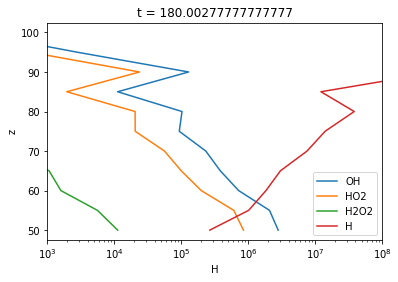

In [31]:
result_total.sel(t=12+24*7, method='nearest').OH.plot(y='z', label='OH')
result_total.sel(t=12+24*7, method='nearest').HO2.plot(y='z', label='HO2')
result_total.sel(t=12+24*7, method='nearest').H2O2.plot(y='z', label='H2O2')
result_total.sel(t=12+24*7, method='nearest').H.plot(y='z', label='H', xscale='log')
plt.legend()
plt.xlim([1e3, 1e8])

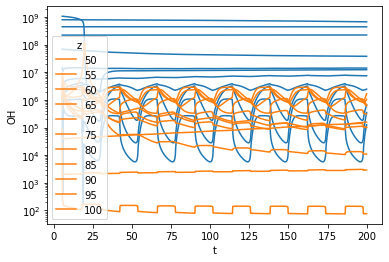

In [13]:
result_total.H.plot.line(x='t', yscale='log', color='C0', add_legend=True)
result_total.OH.plot.line(x='t', yscale='log', color='C1',add_legend=True)
# result_total.HO2.plot.line(x='t', yscale='log', color='C2',add_legend=True)
# result_total.H2O2.plot.line(x='t', yscale='log', color='C3',add_legend=True)
plt.show()


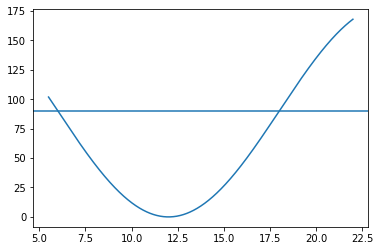

In [115]:
def func_sza(t=np.linspace(0, 3600*24), elv_max=90):
    #t in s
    elv = elv_max - 90*((np.cos(2*np.pi/(3600*24) * t)) + 1)
    return 90-elv
plt.plot(result_total.t, func_sza(result_total.t*3600))
plt.axhline(y=90)

In [58]:
from __future__ import division, print_function

import sys
import time
import multiprocessing as mp
import numpy as np
from scipy.integrate import odeint

def lorenz(q, t, sigma, rho, beta):
    x, y, z = q
    return [sigma*(y - x), x*(rho - z) - y, x*y - beta*z]


def solve(ic):
    t = np.linspace(0, 200, 801)
    sigma = 10.0
    rho = 28.0
    beta = 8/3
    sol = odeint(lorenz, ic, t, args=(sigma, rho, beta), rtol=1e-10, atol=1e-12)
    return sol


if __name__ == "__main__":
    ics = np.random.randn(100, 3)

    print("multiprocessing:", end='')
    tstart = time.time()
    num_processes = 10
    p = mp.Pool(num_processes)
    mp_solutions = p.map(solve, ics)
    tend = time.time()
    tmp = tend - tstart
    print(" %8.3f seconds" % tmp)

    print("serial:         ", end='')
    sys.stdout.flush()
    tstart = time.time()
    serial_solutions = [solve(ic) for ic in ics]
    tend = time.time()
    tserial = tend - tstart
    print(" %8.3f seconds" % tserial)

    print("num_processes = %i, speedup = %.2f" % (num_processes, tserial/tmp))

    check = [(sol1 == sol2).all()
             for sol1, sol2 in zip(serial_solutions, mp_solutions)]
    if not all(check):
        print("There was at least one discrepancy in the solutions.")

multiprocessing:   11.515 seconds
serial:            41.164 seconds
num_processes = 10, speedup = 3.57
